from https://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/

In [161]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
 
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.offline import plot, iplot
import plotly.graph_objs as go
import sys

def transformDataSetTimeSeries(s, window_size):
    """
    Takes a series as an input and creates a dataframe where the rows correspond to a supervised learning format. In this format rows with a length 
    of j will have j-1 X entries and 1 y entry. It is like a "rolling window".
    INPUT:
        - s: pd.Series() with all the values that shall be put in the supervised learning format. Time series data.
        - window_size: integer number that is the window length
    OUTPUT:
        - df: pd.DataFrame() where each row is another window.
    """
    df = pd.DataFrame()
    assert type(window_size) == int
    for ii in range(0,len(s)-window_size):
        t = s.shift(-ii).values[0:window_size+1]
        df = df.append(pd.Series(t),ignore_index=True)

    return df


# make the data structure for supervised learning with the window method
window_size = 3



# Loading the dataset
df = pd.read_csv('./data/time_series_course_data/airline-passengers.csv')

# Random seed for reproducibilty
np.random.seed(7)

# split into train and test set
split = 0.67 # train set
# train data
train_size = int(len(df)*(split))

# test data
train = df.loc[0:train_size-1,:]
test = df.loc[train_size:,:]


# train data
train_df = transformDataSetTimeSeries(train['Passengers'], window_size)
X_train, y_train = train_df.values[:,0:window_size].astype('float32'), train_df.values[:,window_size].astype('float32')


# test data
test_df = transformDataSetTimeSeries(test['Passengers'], window_size)
X_test, y_test = test_df.values[:,0:window_size].astype('float32'), test_df.values[:,window_size].astype('float32')


# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(12, input_dim=window_size, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(X_train, y_train, epochs=400, batch_size=2, verbose=2)
model.fit(X_train, y_train, epochs=400, batch_size=2, verbose=0)



# Estimate model performance
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, np.sqrt(trainScore)))
testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, np.sqrt(testScore)))

# VISUAL INSPECTION
# generate predictions for training and test
trainPredict_data = model.predict(X_train)
testPredict_data = model.predict(X_test)

# TRAINING DATA
# make an empty array
train_predict = np.empty(shape=(len(df),1))
# ensure that it is nan
train_predict[:,:] = np.nan
# insert the training data into the array at the shifted position
train_predict[window_size:len(trainPredict_data)+window_size,:] = trainPredict_data

# TEST DATA
# make an empty array
test_predict = np.empty(shape=(len(df),1))
# ensure that it is nan
test_predict[:,:] = np.nan
# insert the test data into the array at the shifted position
test_predict[window_size+(len(trainPredict_data))+window_size:,:] = testPredict_data # window from train, all the data from the train, window from the test

Train Score: 526.47 MSE (22.95 RMSE)
Test Score: 2310.14 MSE (48.06 RMSE)


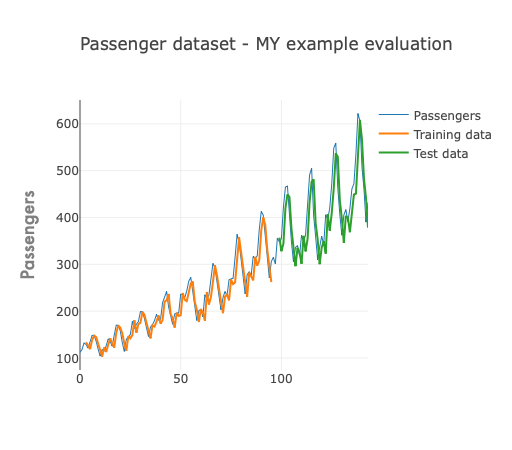

In [162]:
# plt.plot(dataset)
# plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
# plt.show()
import pandas as pd
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.offline import plot, iplot
import plotly.graph_objs as go

# plot with plotly


x=df.index.values
y=df['Passengers'].values

# Create a trace
trace = go.Scatter(
    x = x,
    y = y,
    name = 'Passengers',
    line = dict(
        width = 1
        )
)

# train data
x=np.arange(0,len(train_predict))
y=train_predict.flatten()

# Create a trace
trace2 = go.Scatter(
    x = x,
    y = y,
    name = 'Training data'
)


# test data
x=np.arange(0,len(test_predict))
y=test_predict.flatten().flatten()

# Create a trace
trace3 = go.Scatter(
    x = x,
    y = y,
    name = 'Test data'
)



layout = go.Layout(
            title=go.layout.Title(
                text='Passenger dataset - MY example evaluation',
                xref='paper',
                x=0
            ),
            yaxis=go.layout.YAxis(
                title=go.layout.yaxis.Title(
                    text='Passengers',
                    font=dict(
                        family='Futura',
                        size=18,
                        color='#7f7f7f'
                    )
                )
            ),
            showlegend=True
        )
data = [trace, trace2, trace3]
# data = [trace]

fig = go.Figure(data=data, layout=layout)


iplot(fig)

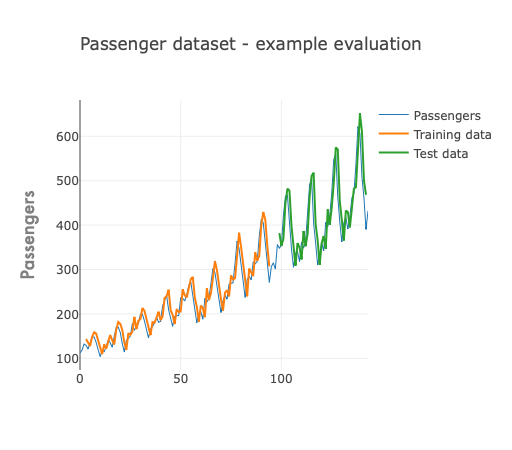

In [151]:
# plt.plot(dataset)
# plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
# plt.show()
import pandas as pd
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.offline import plot, iplot
import plotly.graph_objs as go

# plot with plotly

df_dataset = pd.DataFrame(dataset)
x=df_dataset.index.values
y=df_dataset[0].values

# Create a trace
trace = go.Scatter(
    x = x,
    y = y,
    name = 'Passengers',
    line = dict(
        width = 1
        )
)

# train data
df_trainPredictPlot = pd.DataFrame(trainPredictPlot)
x=df_trainPredictPlot.index.values
y=df_trainPredictPlot[0].values

# Create a trace
trace2 = go.Scatter(
    x = x,
    y = y,
    name = 'Training data'
)


# test data
df_testPredictPlot = pd.DataFrame(testPredictPlot)
x=df_testPredictPlot.index.values
y=df_testPredictPlot[0].values

# Create a trace
trace3 = go.Scatter(
    x = x,
    y = y,
    name = 'Test data'
)



layout = go.Layout(
            title=go.layout.Title(
                text='Passenger dataset - example evaluation',
                xref='paper',
                x=0
            ),
            yaxis=go.layout.YAxis(
                title=go.layout.yaxis.Title(
                    text='Passengers',
                    font=dict(
                        family='Futura',
                        size=18,
                        color='#7f7f7f'
                    )
                )
            ),
            showlegend=True
        )
data = [trace, trace2, trace3]
# data = [trace]

fig = go.Figure(data=data, layout=layout)


iplot(fig)

In [134]:
testdf = pd.DataFrame(np.arange(0,100))
# split into train and test set
split = 0.67 # train set
# train data
train_size = int(len(testdf)*(split))

# test data
train = testdf.loc[0:train_size-1,:]
test = testdf.loc[train_size:,:]


# train data
train_df = transformDataSetTimeSeries(train[0], window_size)
X_train, y_train = train_df.values[:,0:window_size].astype('float32'), train_df.values[:,window_size].astype('float32')


# test data
test_df = transformDataSetTimeSeries(test[0], window_size)
X_test, y_test = test_df.values[:,0:window_size].astype('float32'), test_df.values[:,window_size].astype('float32')